In [1]:
# No sample adjustment - baseline logistic regression - MinMax tag data


In [2]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# module for resampling
from sklearn.utils import resample

In [4]:
# os.getcwd()

In [5]:
# os.listdir(os.getcwd())

In [6]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\steam_all_param_binary_tags_merged.csv")
all_param_df.shape


(39624, 357)

In [7]:
# check for NAN rows
is_NaN = all_param_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = all_param_df[row_has_NaN]
print(len(rows_with_NaN))

8007


In [8]:
print(rows_with_NaN)

         appid  metascore  recommendations  positive_x  negative_x  \
108       3440        NaN              NaN        56.0         2.0   
163       4900        NaN              NaN       177.0        24.0   
166       6010        NaN            811.0       844.0        49.0   
296      10260        NaN              NaN        12.0        10.0   
358      12590        NaN              NaN        29.0        25.0   
...        ...        ...              ...         ...         ...   
39619   891790        NaN              NaN         NaN         NaN   
39620   792660        NaN              NaN         NaN         NaN   
39621  1196310        NaN              NaN         NaN         NaN   
39622   115300        NaN              NaN         NaN         NaN   
39623   900883        NaN              NaN         NaN         NaN   

                          developer                     publisher  maxccu  \
108              PopCap Games, Inc.            PopCap Games, Inc.      17   
163  

In [9]:
all_param_df = all_param_df.dropna()

In [10]:
len(all_param_df)

31617

In [11]:
# using binary classification for logistic regression
y_class = all_param_df['suc_class']

In [12]:
len(y_class)

31617

In [13]:
# create new X parameters df
x_data = all_param_df.drop(['appid','maxccu','success_class','suc_class','followers','positive_y', 'negative_y', 'totaltags', 'recommendations', 'positive_x', 'negative_x']  , axis=1)

In [14]:
x_data.shape

(31617, 346)

In [15]:
#label encode the developer name

In [16]:
x_data['developer']=x_data['developer'].astype('category')

In [17]:
x_data['developer']=x_data['developer'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,88.0,18215,Valve,999,90,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,18215,Valve,499,90,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79.0,18215,Valve,499,90,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,18215,Valve,499,90,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,6687,Valve,499,90,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#label encode the publisher name

In [19]:
x_data['publisher']=x_data['publisher'].astype('category')

In [20]:
x_data['publisher']=x_data['publisher'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,88.0,18215,15327,999,90,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,18215,15327,499,90,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79.0,18215,15327,499,90,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,18215,15327,499,90,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,6687,15327,499,90,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_class, random_state=5)

In [22]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler().fit(X_train)

In [24]:
# apply the trained scales (MinMax) to the training and testing data

X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

In [25]:
# Instantiate and Train model
y = y_train
X = X_train_scaled

clf_1 = LogisticRegression(max_iter=1000).fit(X, y)

In [26]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {clf_1.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf_1.score(X_test_scaled, y_test)}")

Training Data Score: 0.9771002024291497
Testing Data Score: 0.974573055028463


In [27]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = clf_1.predict(X_test_scaled)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7697
           1       0.56      0.15      0.24       208

    accuracy                           0.97      7905
   macro avg       0.77      0.58      0.61      7905
weighted avg       0.97      0.97      0.97      7905



In [29]:
# thinking about baseline results:
# Support is not balanced - 7697 fail cases vs 208 success
# Percision: for no success: 98%, for successful games: 756%
# Recall: Fraction of positives found, 56% for 0, 15% for 1
# f1 score: 97% due to overfitting on failure cases

<AxesSubplot:>

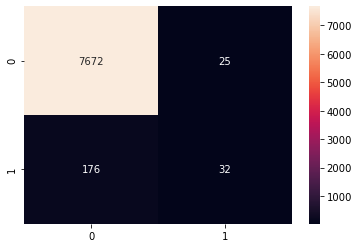

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf_1.predict(X_test_scaled )
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [31]:
# Look at co-efficients for meaning

print(x_data.columns.shape, clf_1.coef_.shape)
new_col = np.reshape(clf_1.coef_, -1)
print(new_col.shape)
features_list = pd.DataFrame(zip(x_data.columns, new_col))
features_list = features_list.sort_values(by=[1], ascending=False)

import pandas
pandas.set_option('display.max_rows', 346)
features_list

(346,) (1, 346)
(346,)


,0,1
0,metascore,1.630587
3,maxprice,1.505668
4,maxdiscount,1.476117
148,tagepisodic,1.350260
324,tagwordgame,1.070324
108,tagmultiplayer,1.015848
84,tagbasketball,0.994602
53,tagsoccer,0.968219
158,tagassassin,0.927767
219,tagremake,0.832653
